In [24]:
#Pregunta 1
from sklearn import datasets 
import numpy as np 
import pandas as pd

iris = datasets.load_iris() 
X = iris.data[:, [2, 3]] 
y = iris.target

DF = pd.DataFrame.from_records(data=iris.data,columns=iris.feature_names)
DF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
#Pregunta 2

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
sc.fit(X_train) 

X_train_std = sc.transform(X_train)
X_test_std = sc.fit_transform(X_test)

colu=["Largo","Ancho"]
DFaux = pd.DataFrame.from_records(data=X_train_std,columns=colu)
DFaux.head()


,Largo,Ancho
0,0.038588,-0.113261
1,0.644077,0.780977
2,0.754166,0.397732
3,0.423899,0.653229
4,0.699121,0.908726


No handles with labels found to put in legend.


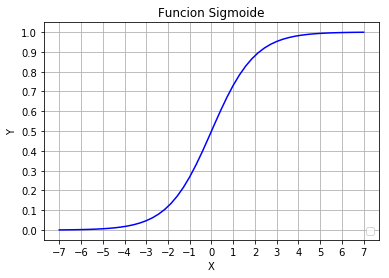

In [26]:
#Pregunta 3 

from matplotlib import pylab
import pylab as plt
import numpy as np


def sigmoid(x):
    return (1 / (1 + np.exp(-x)))
 
x = plt.linspace(-7,7)
y = plt.linspace(-7,7)
plt.plot(y, sigmoid(y), 'b')
plt.grid()


plt.title('Funcion Sigmoide')
plt.legend(loc='lower right')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [27]:
#Pregunta 4


from matplotlib.colors import ListedColormap
def versiontuple(v):
    return tuple(map(int, (v.split("."))))
def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

C:\Users\marcelo\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\marcelo\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a sin

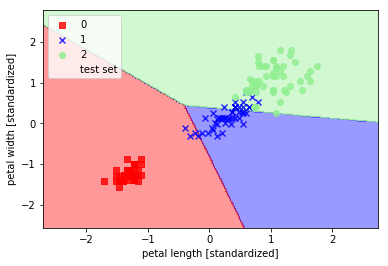

In [28]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train_std,y_train)

#plot_decision_region(X,y,1e3,test_idx=None, resolution=0.02)
#el truco esta en el parametro C

#Entrene el modelo con el set de entrenamiento
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


plot_decision_region(X_combined_std,y_combined,LR,test_idx=range(105,150), resolution=0.02)
#utilice la función plot_decision_region para plotear los resultados


plt.xlabel('petal length [standardized]') 
plt.ylabel('petal width [standardized]') 
plt.legend(loc='upper left') 
plt.show()
#Mostrar resultado de predicciones

In [29]:
#Pregunta 6
#hay que darle cierto parametro para entregar la salida que queremos
weights, params = [], [10**c for c in np.arange(-5,5, dtype=float)]
for c in params: 
    #Entrenar modelo y almacenar los pesos por parámetro
#Debo obtener los pesos en cada pasada y luego almacenarlos en weights
weights = np.array(weights)


#plotear ambos length y width de los pesos
plt.ylabel('weight coefficient') 
plt.xlabel('C') 
plt.legend(loc='upper left') 
plt.xscale('log') 
plt.show()


IndentationError: expected an indented block (<ipython-input-29-2a4416add4f8>, line 7)